**Importing modules**

In [9]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as clr

import seaborn as sns

**Setup Matplotlib**

In [6]:
%matplotlib inline
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]=12

colors=[(0,0.37,0.63), (0.863, 0.078, 0.235), (1, 0.84, 0)]
n_bins=3
cmap_name='my_list'
cmap=clr.LinearSegmentedColormap.from_list(cmap_name,colors,N=n_bins)

**Loading Data**

In [ ]:
data=pd.read_csv("data/adiabatic_1000_sk54.csv")
X=data[['T_0','X_fu']]
y=data['Label']
T_ad_K=data['T_ad_K']
CH2O=data['CH2O']


We plot the temperature and formaldehyde, which defines the low and high temperature ignition behavior in the 3 three classes (low T, high T, no ignition)

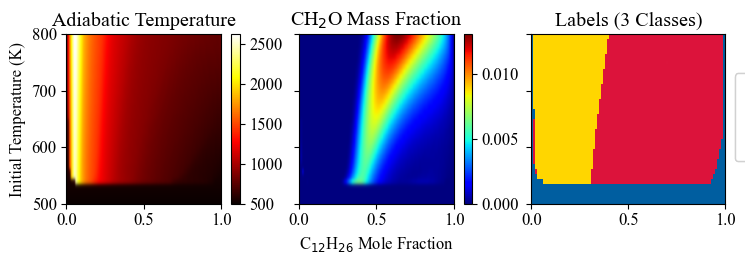

In [12]:
fig, axs= plt.subplots(1,3,figsize=(8.5,2.2),sharey=True)
image=axs[0].imshow(np.flipud(np.array(T_ad_K).reshape(34,100)),extent=[0,1,500,800],aspect='auto',interpolation='gaussian',cmap='hot')
axs[0].set_title('Adiabatic Temperature')
axs[0].set_ylabel('Initial Temperature (K)')
fig.colorbar(image, ax=axs[0])

image=axs[1].imshow(np.flipud(np.array(CH2O).reshape(34,100)),extent=[0,1,500,800]
           ,aspect='auto',interpolation = 'gaussian',cmap = 'jet')
axs[1].set_title(r'CH$_2$O Mass Fraction')
axs[1].set_xlabel(r"C$_{12}$H$_{26}$ Mole Fraction")
fig.colorbar(image, ax=axs[1])

axs[2].imshow(np.flipud(np.array(y).reshape(34,100)),extent=[0,1,500,800]
           ,aspect='auto',interpolation = 'none',cmap = cmap)
axs[2].set_title('Labels (3 Classes)')

my_scatter = axs[2].scatter([0,0.7,0.2],[500,750,750],c=[0,1,2],cmap=cmap,marker='.',s=12)
legend1 = axs[2].legend(*(my_scatter.legend_elements()[0],["No Ignition",r"Low $T$ Ignition",r"High $T$ Ignition"]),
                    loc=(1.05,0.25),ncol = 1,columnspacing=-0.2)
axs[2].add_artist(legend1)